In [1]:
!pip install seaborn
!pip install openpyxl

In [71]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Shor_Data.xlsx to Shor_Data.xlsx


In [39]:
filepath = 'Shor_Data.xlsx'
data = pd.read_excel(filepath)

In [40]:
# Convert columns to numeric and clean up any time format issues
def convert_time_to_seconds(time_str):
    if pd.isnull(time_str):
        return np.nan
    if isinstance(time_str, (int, float)):
        return time_str
    try:
        if 'm' in time_str:
            parts = time_str.split('m')
            minutes = int(parts[0].strip())
            seconds = float(parts[1].replace('s', '').strip())
            return minutes * 60 + seconds
        elif 's' in time_str:
            return float(time_str.replace('s', '').strip())
    except ValueError:
        return np.nan

data['time quantum part'] = data['time quantum part'].apply(convert_time_to_seconds)

In [50]:
carlotta_simulation = data[(data['Algorithm'] == 'Carlotta') & (data['Mode'] == 'Simulation')]
carlotta_ibm = data[(data['Algorithm'] == 'Carlotta') & (data['Mode'] == 'IBM')]
laura_ibm = data[(data['Algorithm'] == 'Laura') & (data['Mode'] == 'IBM')]
laura_simulation = data[(data['Algorithm'] == 'Laura') & (data['Mode'] == 'Simulation')]
max_ibm = data[(data['Algorithm'] == 'Max') & (data['Mode'] == 'IBM')]
max_simulation = data[(data['Algorithm'] == 'Max') & (data['Mode'] == 'Simulation')]

# Remove additional values
laura_ibm = laura_ibm[(laura_ibm['N'] != 39) & (laura_ibm['N'] != 77) & (laura_ibm['N'] != 85)]
laura_simulation = laura_simulation[(laura_simulation['N'] != 39) & (laura_simulation['N'] != 77) & (laura_simulation['N'] != 85)]

# Group comparison
1. Accuracy comparison between different code on ibm run
2. Accuracy comparison between different code on simulation
3. Time comparison between different code on ibm


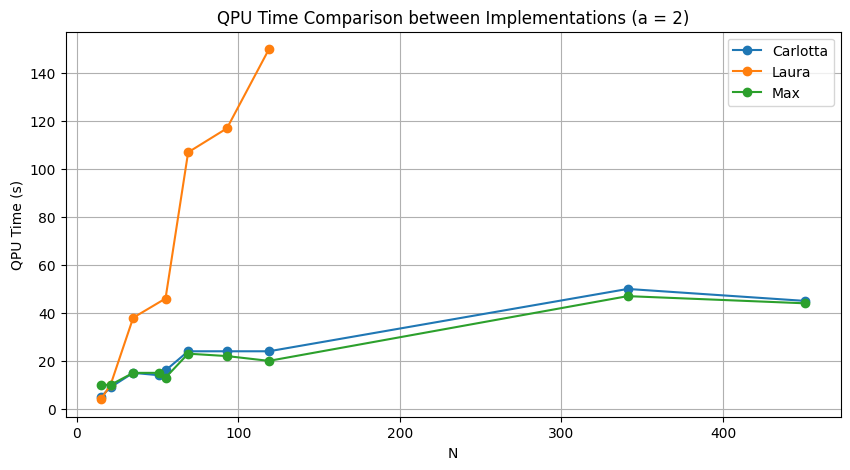

In [17]:
carlotta_ibm_filtered = carlotta_ibm[(carlotta_ibm['a'] == 2) & (carlotta_ibm['accuracy'] != 0)]
laura_ibm_filtered = laura_ibm[(laura_ibm['a'] == 2) & (laura_ibm['accuracy'] != 0)]
max_ibm_filtered = max_ibm[(max_ibm['a'] == 2) & (max_ibm['accuracy'] != 0)]

# Time quantum comparison between Implementations for Mode IBM
plt.figure(figsize=(10, 5))
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['time quantum part'], label='Carlotta', marker='o')
plt.plot(laura_ibm_filtered['N'], laura_ibm_filtered['time quantum part'], label='Laura', marker='o')
plt.plot(max_ibm_filtered['N'], max_ibm_filtered['time quantum part'], label='Max', marker='o')
plt.title('QPU Time Comparison between Implementations (a = 2)')
plt.xlabel('N')
plt.ylabel('QPU Time (s)')
plt.legend()
plt.grid(True)

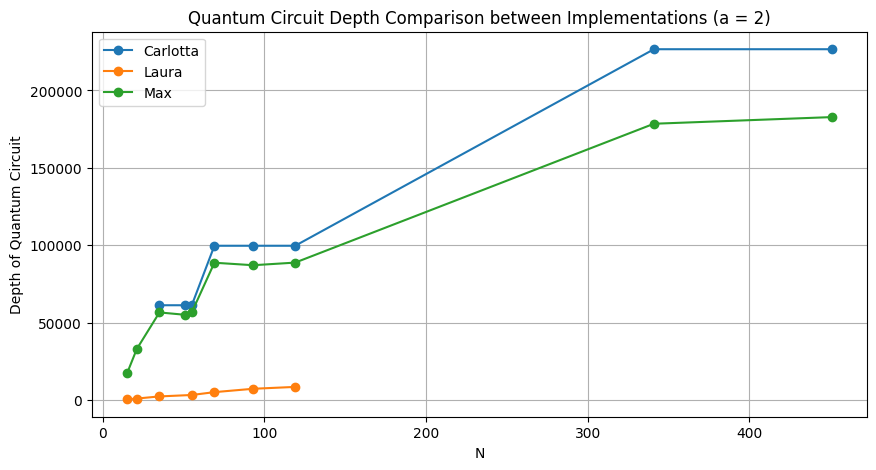

In [23]:
carlotta_ibm_filtered = carlotta_ibm[(carlotta_ibm['a'] == 2) & (carlotta_ibm['accuracy'] != 0)]
laura_ibm_filtered = laura_ibm[(laura_ibm['a'] == 2) & (laura_ibm['accuracy'] != 0)]
max_ibm_filtered = max_ibm[(max_ibm['a'] == 2) & (max_ibm['accuracy'] != 0)]

# Depth & number of qubits comparison between Implementations for Mode IBM
plt.figure(figsize=(10, 5))
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['depth'], label='Carlotta', marker='o')
plt.plot(laura_ibm_filtered['N'], laura_ibm_filtered['depth'], label='Laura', marker='o')
plt.plot(max_ibm_filtered['N'], max_ibm_filtered['depth'], label='Max', marker='o')
plt.title('Quantum Circuit Depth Comparison between Implementations (a = 2)')
plt.xlabel('N')
plt.ylabel('Depth of Quantum Circuit')
plt.legend()
plt.grid(True)

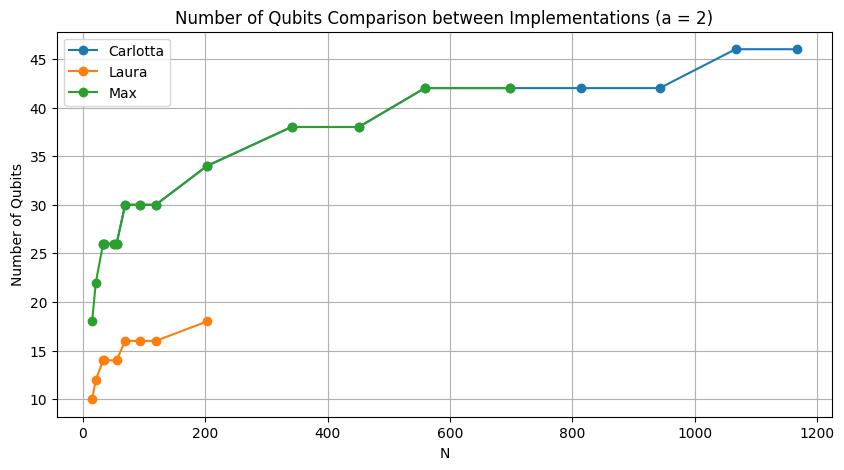

In [25]:
carlotta_ibm_filtered = carlotta_ibm[(carlotta_ibm['a'] == 2)]
laura_ibm_filtered = laura_ibm[(laura_ibm['a'] == 2)]
max_ibm_filtered = max_ibm[(max_ibm['a'] == 2)]

# Depth & number of qubits comparison between Implementations for Mode IBM
plt.figure(figsize=(10, 5))
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['qubits'], label='Carlotta', marker='o')
plt.plot(laura_ibm_filtered['N'], laura_ibm_filtered['qubits'], label='Laura', marker='o')
plt.plot(max_ibm_filtered['N'], max_ibm_filtered['qubits'], label='Max', marker='o')
plt.title('Number of Qubits Comparison between Implementations (a = 2)')
plt.xlabel('N')
plt.ylabel('Number of Qubits')
plt.legend()
plt.grid(True)

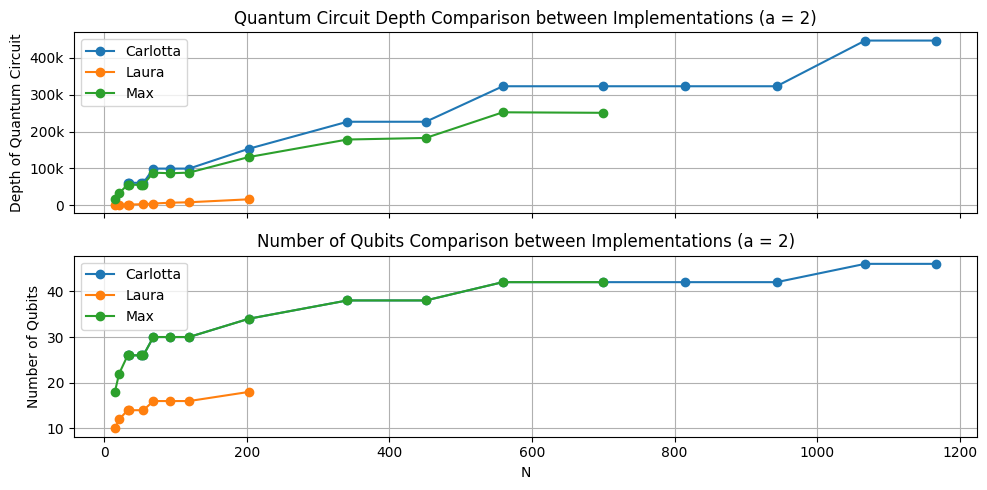

In [74]:
import matplotlib.pyplot as plt

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

# Plot 1: Quantum Circuit Depth Comparison
ax1.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['depth'], label='Carlotta', marker='o')
ax1.plot(laura_ibm_filtered['N'], laura_ibm_filtered['depth'], label='Laura', marker='o')
ax1.plot(max_ibm_filtered['N'], max_ibm_filtered['depth'], label='Max', marker='o')

def thousands_formatter(x, pos):
    if x == 0:
        return int(x)
    else:
        return f'{int(x / 1000)}k'  # Divide by 1000 and add 'k'


# Apply the formatter to the y-axis
ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Customize the first plot (Depth)
ax1.set_title('Quantum Circuit Depth Comparison between Implementations (a = 2)')
ax1.set_ylabel('Depth of Quantum Circuit')
ax1.grid(True)
ax1.legend()

# Plot 2: Number of Qubits Comparison
ax2.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['qubits'], label='Carlotta', marker='o')
ax2.plot(laura_ibm_filtered['N'], laura_ibm_filtered['qubits'], label='Laura', marker='o')
ax2.plot(max_ibm_filtered['N'], max_ibm_filtered['qubits'], label='Max', marker='o')

# Customize the second plot (Qubits)
ax2.set_title('Number of Qubits Comparison between Implementations (a = 2)')
ax2.set_xlabel('N')
ax2.set_ylabel('Number of Qubits')
ax2.grid(True)
ax2.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


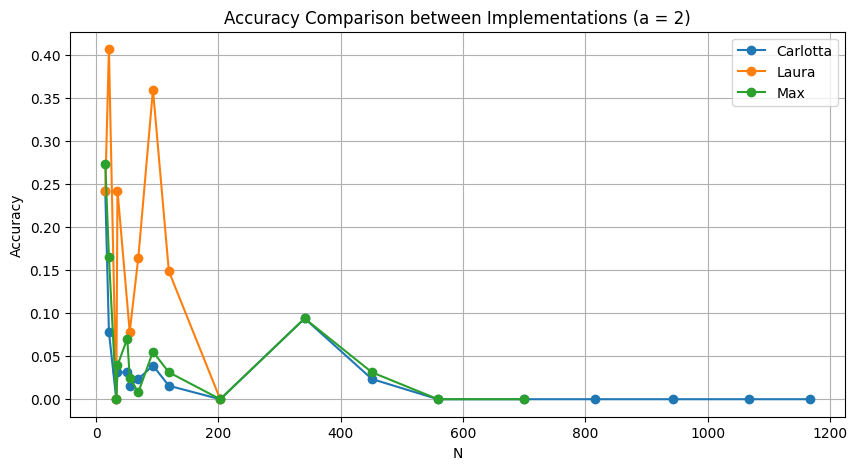

In [33]:
carlotta_ibm_filtered = carlotta_ibm[(carlotta_ibm['a'] == 2)]
laura_ibm_filtered = laura_ibm[(laura_ibm['a'] == 2)]
max_ibm_filtered = max_ibm[(max_ibm['a'] == 2)]

# Accuracy comparison between Implementations for Mode IBM
plt.figure(figsize=(10, 5))
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['accuracy'], label='Carlotta', marker='o')
plt.plot(laura_ibm_filtered['N'], laura_ibm_filtered['accuracy'], label='Laura', marker='o')
plt.plot(max_ibm_filtered['N'], max_ibm_filtered['accuracy'], label='Max', marker='o')
plt.title('Accuracy Comparison between Implementations (a = 2)')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.bar()

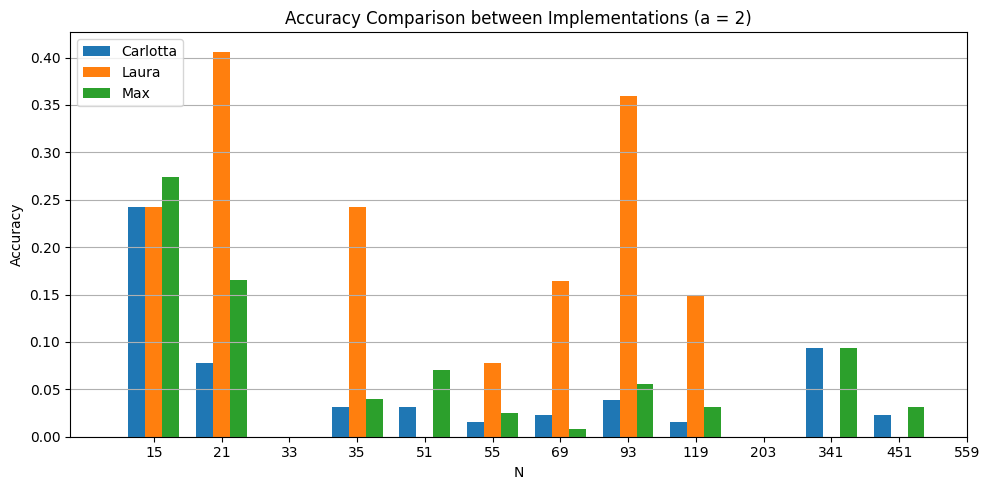

In [76]:
carlotta_ibm_filtered = carlotta_ibm[(carlotta_ibm['a'] == 2)]
laura_ibm_filtered = laura_ibm[(laura_ibm['a'] == 2)]
max_ibm_filtered = max_ibm[(max_ibm['a'] == 2)]

df_carlotta = pd.DataFrame(carlotta_ibm_filtered)
df_laura = pd.DataFrame(laura_ibm_filtered)
df_max = pd.DataFrame(max_ibm_filtered)

df_carlotta = df_carlotta.rename(columns={'accuracy': 'accuracy_carlotta'})
df_laura = df_laura.rename(columns={'accuracy': 'accuracy_laura'})
df_max = df_max.rename(columns={'accuracy': 'accuracy_max'})

df_combined = df_carlotta.merge(df_laura, on='N', how='outer').merge(df_max, on='N', how='outer')

index = np.arange(len(df_combined['N']))  # Positions for each unique N
bar_width = 0.25

# Plotting x vs y in a bar plot
plt.figure(figsize=(10, 5))
plt.bar(index - bar_width, df_combined['accuracy_carlotta'], width=bar_width, label='Carlotta')
plt.bar(index, df_combined['accuracy_laura'], width=bar_width, label='Laura')
plt.bar(index + bar_width, df_combined['accuracy_max'], width=bar_width, label='Max')

plt.xlabel('N')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Implementations (a = 2)')
plt.xticks(index, df_combined['N'].astype(int))
plt.xlim(right=12) # adapt if needed
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Individual
1. comparison between accuracy simulation vs. real ibm run
2. comparison execution time accuracy simulation vs. real ibm run

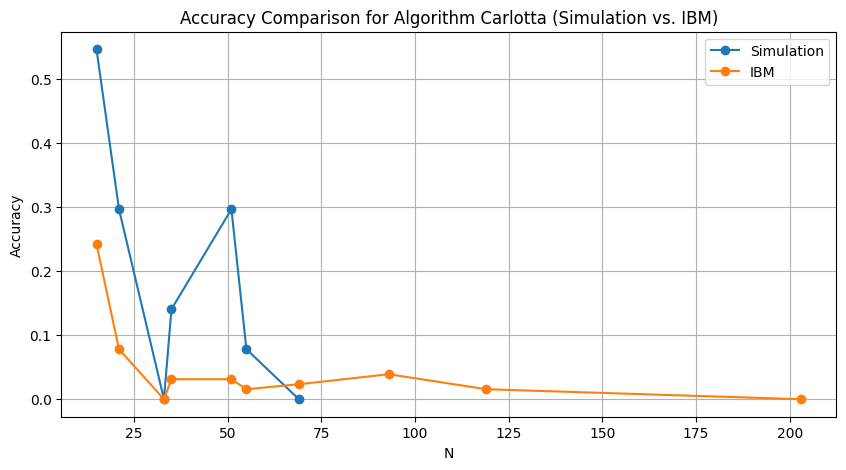

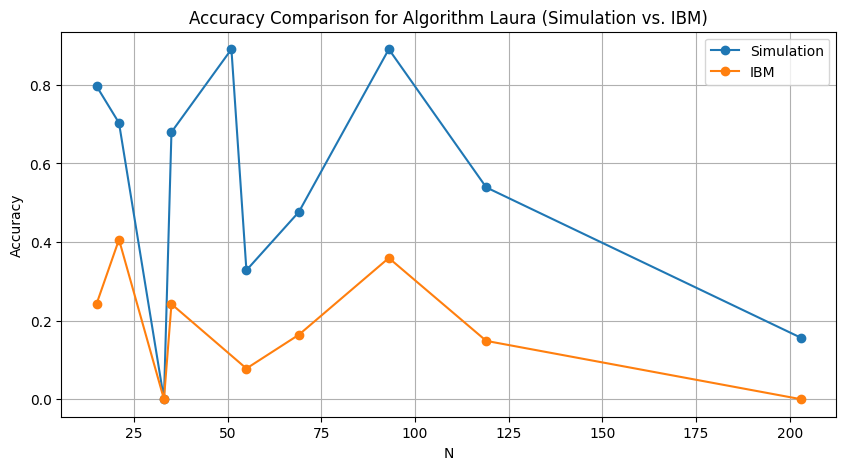

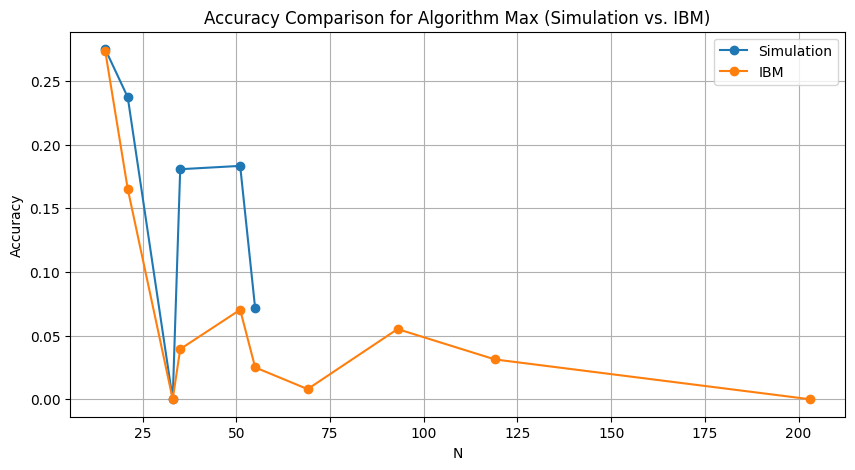

In [77]:
carlotta_ibm_filtered = carlotta_ibm[(carlotta_ibm['a'] == 2) & (carlotta_ibm['N'] <= 203)]
laura_ibm_filtered = laura_ibm[(laura_ibm['a'] == 2) & (laura_ibm['N'] <= 203)]
max_ibm_filtered = max_ibm[(max_ibm['a'] == 2) & (max_ibm['N'] <= 203)]

carlotta_simulation_filtered = carlotta_simulation[(carlotta_simulation['a'] == 2)]
laura_simulation_filtered = laura_simulation[(laura_simulation['a'] == 2)]
max_simulation_filtered = max_simulation[(max_simulation['a'] == 2)]

# Comparison of accuracy for Mode Simulation vs. IBM for Algorithm Carlotta
plt.figure(figsize=(10, 5))
plt.plot(carlotta_simulation_filtered['N'], carlotta_simulation_filtered['accuracy'], label='Simulation', marker='o')
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['accuracy'], label='IBM', marker='o')
plt.title('Accuracy Comparison for Algorithm Carlotta (Simulation vs. IBM)')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Comparison of accuracy for Mode Simulation vs. IBM for Algorithm Laura
plt.figure(figsize=(10, 5))
plt.plot(laura_simulation_filtered['N'], laura_simulation_filtered['accuracy'], label='Simulation', marker='o')
plt.plot(laura_ibm_filtered['N'], laura_ibm_filtered['accuracy'], label='IBM', marker='o')
plt.title('Accuracy Comparison for Algorithm Laura (Simulation vs. IBM)')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Comparison of accuracy for Mode Simulation vs. IBM for Algorithm Max
plt.figure(figsize=(10, 5))
plt.plot(max_simulation_filtered['N'], max_simulation_filtered['accuracy'], label='Simulation', marker='o')
plt.plot(max_ibm_filtered['N'], max_ibm_filtered['accuracy'], label='IBM', marker='o')
plt.title('Accuracy Comparison for Algorithm Max (Simulation vs. IBM)')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

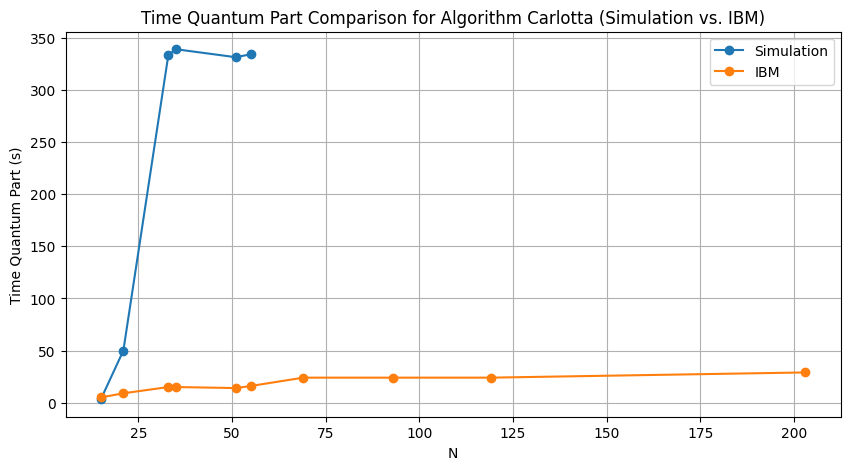

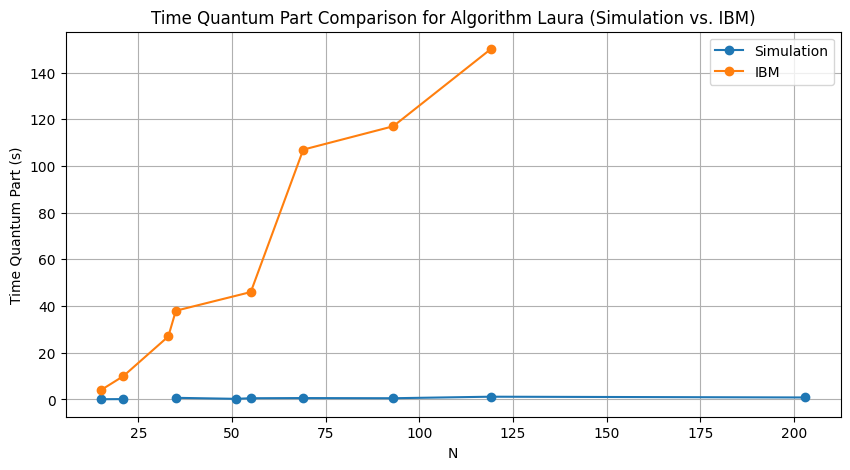

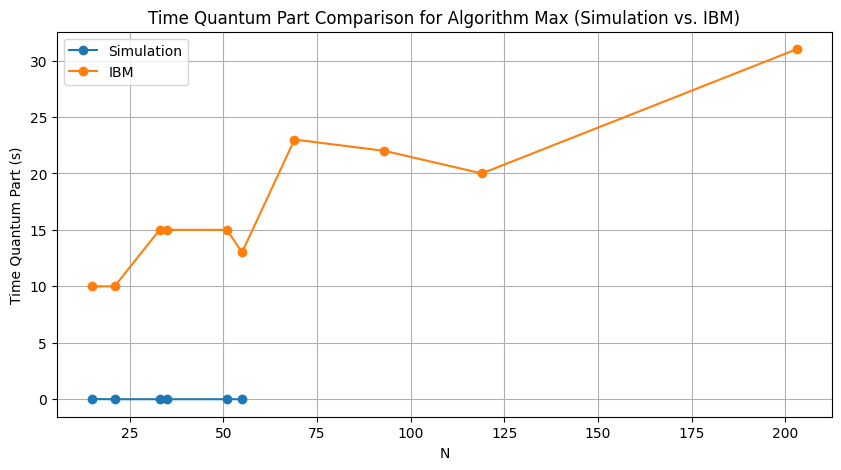

In [30]:
carlotta_ibm_filtered = carlotta_ibm[(carlotta_ibm['a'] == 2) & (carlotta_ibm['N'] <= 203)]
laura_ibm_filtered = laura_ibm[(laura_ibm['a'] == 2) & (laura_ibm['N'] <= 203)]
max_ibm_filtered = max_ibm[(max_ibm['a'] == 2) & (max_ibm['N'] <= 203)]

carlotta_simulation_filtered = carlotta_simulation[(carlotta_simulation['a'] == 2)]
laura_simulation_filtered = laura_simulation[(laura_simulation['a'] == 2)]
max_simulation_filtered = max_simulation[(max_simulation['a'] == 2)]

# Comparison of time quantum part for Mode Simulation vs. IBM for Algorithm Carlotta
plt.figure(figsize=(10, 5))
plt.plot(carlotta_simulation_filtered['N'], carlotta_simulation_filtered['time quantum part'], label='Simulation', marker='o')
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['time quantum part'], label='IBM', marker='o')
plt.title('Time Quantum Part Comparison for Algorithm Carlotta (Simulation vs. IBM)')
plt.xlabel('N')
plt.ylabel('Time Quantum Part (s)')
plt.legend()
plt.grid(True)

# Comparison of time quantum part for Mode Simulation vs. IBM for Algorithm Laura
plt.figure(figsize=(10, 5))
plt.plot(laura_simulation_filtered['N'], laura_simulation_filtered['time quantum part'], label='Simulation', marker='o')
plt.plot(laura_ibm_filtered['N'], laura_ibm_filtered['time quantum part'], label='IBM', marker='o')
plt.title('Time Quantum Part Comparison for Algorithm Laura (Simulation vs. IBM)')
plt.xlabel('N')
plt.ylabel('Time Quantum Part (s)')
plt.legend()
plt.grid(True)

# Comparison of time quantum part for Mode Simulation vs. IBM for Algorithm Max
plt.figure(figsize=(10, 5))
plt.plot(max_simulation_filtered['N'], max_simulation_filtered['time quantum part'], label='Simulation', marker='o')
plt.plot(max_ibm_filtered['N'], max_ibm_filtered['time quantum part'], label='IBM', marker='o')
plt.title('Time Quantum Part Comparison for Algorithm Max (Simulation vs. IBM)')
plt.xlabel('N')
plt.ylabel('Time Quantum Part (s)')
plt.legend()
plt.grid(True)


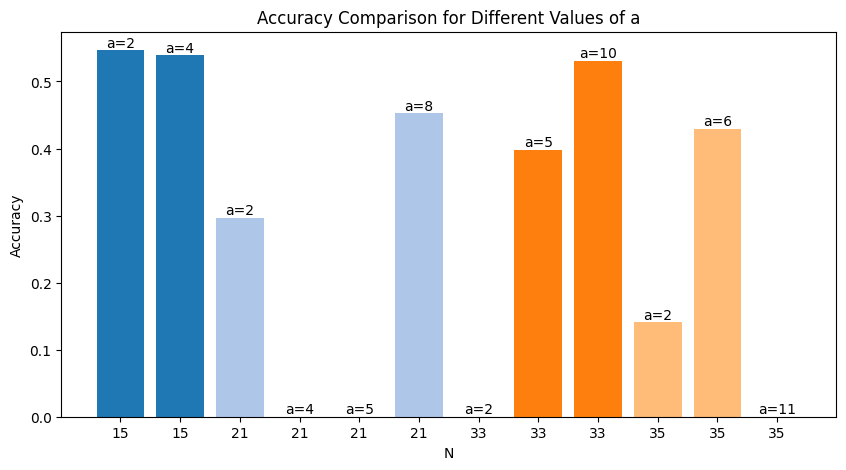

In [84]:
# Creating the data frame based on the provided image data
data = {
    'N': [15, 15, 21,21, 21, 21, 33, 33, 33, 35, 35, 35],
    'a': [2, 4, 2, 4, 5, 8, 2, 5, 10, 2, 6, 11],
    'accuracy': [0.546875, 0.539062, 0.296875, 0., 0., 0.453125, 0.0, 0.398438, 0.531250, 0.140625, 0.429688, 0.]
}
df = pd.DataFrame(data)

unique_N = df['N'].unique()
colors = plt.cm.tab20.colors  # Using a colormap for distinct colors
color_map = {n: colors[i % len(colors)] for i, n in enumerate(unique_N)}

plt.figure(figsize=(10, 5))
# Plotting each bar with the corresponding color for its N value
for i, row in df.iterrows():
    plt.bar(i, row['accuracy'], color=color_map[row['N']], label=f'N={row["N"]}' if i == list(df['N']).index(row['N']) else "")
    # Adding the value of 'a' above each bar
    plt.text(i, row['accuracy'], f'a={int(row["a"])}', ha='center', va='bottom', fontsize=10)

plt.xlabel('N')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Values of a')
plt.xticks(df.index, df['N'])
plt.show()